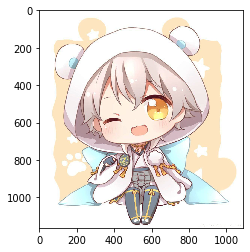

In [1]:
# Đồ án 2:Image Processing
# **CHỈ ĐƯỢC PHÉP** sử dụng các thư viện sau: PIL, numpy, matplotlib
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt   
img = Image.open("character.jpg") 
plt.imshow(img)
pixels = img.load()
img_new = Image.new(img.mode, img.size)
pixels_new = img_new.load()
width, height = img_new.size
#print(width)
#print(height)
# Hàm trả về các giá trị nằm trong khoảng 0 đến 255
def truncate(value):
    if(value < 0):
        return 0
    if(value > 255):
        return 255
    return value

Enter scalar of Brightness: 30
None


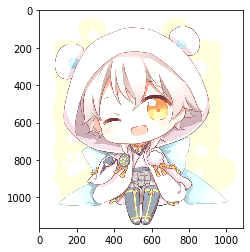

In [2]:
# THAY ĐỔI ĐỘ SÁNG CỦA ẢNH
def Brightness():
    scalar = int(input('Enter scalar of Brightness: '))
    for i in range(width):
        for j in range(height):
            r, b, g = pixels[i,j]
            red = truncate(r + scalar)
            blue = truncate(b + scalar)
            green = truncate(g + scalar)
            pixels_new[i,j] = (red, blue, green)
    plt.imshow(img_new)
print(Brightness())

Enter scalar of Contrast: 128
None


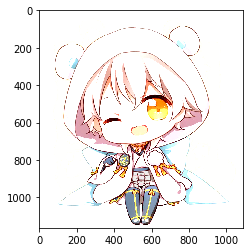

In [3]:
# THAY ĐỔI ĐỘ TƯƠNG PHẢN CỦA ẢNH
def Contrast():
    scalar = float(input('Enter scalar of Contrast: '))
    factor = (259 * (scalar + 255)) / (255 * (259 - scalar))
    for i in range(width):
        for j in range(height):
            r, b, g = pixels[i,j]
            red = (truncate(int(factor) * (r - 128) + 128))
            blue = (truncate(int(factor) * (b - 128) + 128))
            green = truncate(int(factor) * (g - 128) + 128)
            pixels_new[i,j] =(red, blue, green)
    plt.imshow(img_new)
print(Contrast())

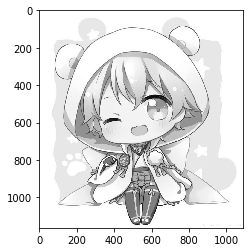

In [12]:
# CHUYỂN ĐỔI ẢNH RGB THÀNH ẢNH XÁM
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
img = Image.open("character.jpg")
pixels = np.array(img)
width = pixels.shape[0]
height = pixels.shape[1]
def Grayscale(img):
    add_img = []
    for i in range(width):
        for j in range(height):  
            r, g, b = pixels[i,j]
            gray = 0.3086*r + 0.6094*g + 0.0820*b  
            add_img.append(int(gray))
    add_img = np.array(add_img)
    return add_img
img_new = Grayscale(img).reshape(width, height)
plt.imshow(img_new, cmap = plt.get_cmap("gray"))

None


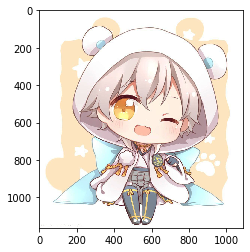

In [5]:
# LẬT ẢNH NGANG
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
img = Image.open("character.jpg") 
plt.imshow(img)
pixels = img.load()
img_new = Image.new(img.mode, img.size)
pixels_new = img_new.load()
width, height = img_new.size
def Flip():
    for i in range(width):
        for j in range(height):
            r, b, g = pixels[i,j]
            pixels_new[width - i - 1 , j] = (r,b,g)
    plt.imshow(img_new)
print(Flip())

None


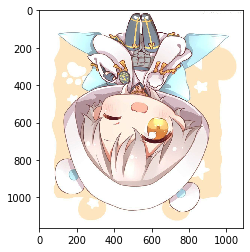

In [6]:
# LẬT ẢNH DỌC
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
img = Image.open("character.jpg") 
plt.imshow(img)
pixels = img.load()
img_new = Image.new(img.mode, img.size)
pixels_new = img_new.load()
width, height = img_new.size
def Flip():
    for i in range(width):
        for j in range(height):
            r, b, g = pixels[i,j]
            pixels_new[i , height - j - 1] = (r,b,g)
    plt.imshow(img_new)
print(Flip())

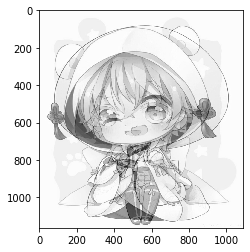

In [11]:
# CHỒNG HAI ẢNH CÙNG KÍCH THƯỚC
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
img_1 = Image.open("character.jpg")
pixels_1 = np.array(img_1)
img_2 = Image.open("back.jpg")
pixels_2 = np.array(img_2)
width = pixels_1.shape[0]
height = pixels_1.shape[1]
def Overley(img_1, img_2):
    add_img = []
    for i in range(width):
        for j in range(height):  
            r1, g1, b1 = pixels_1[i,j]
            gray1 = 0.3086*r1 + 0.6094*g1 + 0.0820*b1
            r2, g2, b2 = pixels_2[i,j]
            gray2 = 0.3086*r2 + 0.6094*g2 + 0.0820*b2           
            add_img.append(int(gray1 + gray2))
    add_img = np.array(add_img)
    return add_img
img_new = Overley(img_1, img_2).reshape(width,height)
plt.imshow(img_new, cmap = plt.get_cmap("gray"))

In [14]:
# LÀM MỜ ẢNH
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
img = Image.open("back.jpg")
pixels = img.load()
img_new = Image.new(img.mode, img.size)
pixels_new = img_new.load()
width, height = img_new.size

None


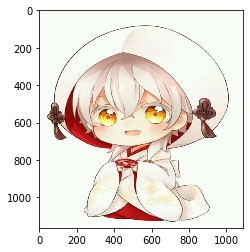

In [9]:
def Boxblur():
    for i in range(width):
        for j in range(height):
            if i < 1 or j < 1 or i + 1 == width or j + 1 == height :              
                continue
            else :
                r1, b1, g1 = pixels[i - 1, j + 1] 
                r2, b2, g2 = pixels[i + 0, j + 1] 
                r3, b3, g3 = pixels[i + 1, j + 1] 
                r4, b4, g4 = pixels[i - 1, j + 0] 
                r5, b5, g5 = pixels[i + 0, j + 0] 
                r6, b6, g6 = pixels[i + 1, j + 0]
                r7, b7, g7 = pixels[i - 1, j - 1] 
                r8, b8, g8 = pixels[i + 0, j - 1] 
                r9, b9, g9 = pixels[i + 1, j - 1] 
                red = int(( r1 + r2 + r3 + r4 + r5 + r6 + r7 + r8 + r9 ) /9)
                blue = int(( b1 + b2 + b3 + b4 + b5 + b6 + b7 + b8 + b9 ) /9)
                green = int(( g1 + g2 + g3 + g4 + g5 + g6 + g7 + g8 + g9 ) /9)
                pixels_new[i, j] = (red, blue, green)
    plt.imshow(img_new)
print(Boxblur())